<a href="https://colab.research.google.com/github/NightProwler29/Colab/blob/main/Copy_of_SPX20192024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Step 1: Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error
import tensorflow as tf
from keras import Model
from keras.layers import Input, Dense, Dropout
from keras.layers import LSTM

In [ ]:
#  Step 2: Reading Dataset

df = pd.read_csv('SPX.csv')

In [ ]:
#  Step 3: Dataset Overview

df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-01-04,2474.330078,2538.070068,2474.330078,2531.939941,2531.939941,4234140000
1,2019-01-07,2535.610107,2566.159912,2524.560059,2549.689941,2549.689941,4133120000
2,2019-01-08,2568.110107,2579.820068,2547.560059,2574.409912,2574.409912,4120060000
3,2019-01-09,2580.000000,2595.320068,2568.889893,2584.959961,2584.959961,4088740000
4,2019-01-10,2573.510010,2597.820068,2562.020020,2596.639893,2596.639893,3721300000
...,...,...,...,...,...,...,...
1253,2023-12-27,4773.450195,4785.390137,4768.899902,4781.580078,4781.580078,2748450000
1254,2023-12-28,4786.439941,4793.299805,4780.979980,4783.350098,4783.350098,2698860000
1255,2023-12-29,4782.879883,4788.430176,4751.990234,4769.830078,4769.830078,3126060000
1256,2024-01-02,4745.200195,4754.330078,4722.669922,4742.830078,4742.830078,3743050000


In [ ]:
#  Dataset Basic Information:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1258 non-null   object 
 1   Open       1258 non-null   float64
 2   High       1258 non-null   float64
 3   Low        1258 non-null   float64
 4   Close      1258 non-null   float64
 5   Adj Close  1258 non-null   float64
 6   Volume     1258 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 68.9+ KB


In [ ]:
#  Step 4: Data Preparation
#  Step 4.1: Feature Subset Selection
#  Since we will not use Adj Close and Volume features to predict Price, we will drop these two features:


df.drop(['Adj Close', 'Volume'], axis=1, inplace= True)

In [ ]:
#  Step 4.2: Transforming Data
#  Date feature is stored as object in the data frame. To increase the speed of calculations, we convert it's data type to datetime and then sort this feature in ascending order:

df['Date'] = pd.to_datetime(df['Date'])
df.sort_values(by='Date', ascending=True, inplace=True)
df.reset_index(drop=True, inplace=True)

In [ ]:
#  The " , " sign is redundant in the dataset. First, we remove it from the entire dataset and then change the data type of the numerical variables to float:

NumCols = df.columns.drop(['Date'])
df[NumCols] = df[NumCols].replace({',': ''}, regex=True)
df[NumCols] = df[NumCols].astype('float64')

df.head()

,Date,Open,High,Low,Close
0,2019-01-04,2474.330078,2538.070068,2474.330078,2531.939941
1,2019-01-07,2535.610107,2566.159912,2524.560059,2549.689941
2,2019-01-08,2568.110107,2579.820068,2547.560059,2574.409912
3,2019-01-09,2580.000000,2595.320068,2568.889893,2584.959961
4,2019-01-10,2573.510010,2597.820068,2562.020020,2596.639893


In [ ]:
#  Step 4.3: Checking Duplicates
#  There are no duplicate samples in Date feature:

df.duplicated().sum()

0

In [ ]:
#  Step 4.4: Checking Missing Values
#  There are no missing values in the dataset:


# df = df.dropna()

df.isnull().sum().sum()

#null_values = df[df.isnull().any(axis=1)]
#print(null_values)

0

In [ ]:
#  Step 5: Visualizing Bitcoin Price History Data
#  Interactive Bitcoin Price Chart:

fig = px.line(y=df.Close, x=df.Date)
fig.update_traces(line_color='black')
fig.update_layout(xaxis_title="Date",
                  yaxis_title="Scaled Price",
                  title={'text': "SPX Price History Data", 'y':0.95, 'x':0.5, 'xanchor':'center', 'yanchor':'top'},
                  plot_bgcolor='rgba(255,223,0,0.8)')

In [ ]:
#  Step 6: Splitting Data to Training & Test Sets

#  Since we cannot train on future data in time series data, we should not divide the time series data randomly.
#  In time series splitting, testing set is always later than training set.
#  We consider the last year for testing and everything else for training:

test_size = df[df.Date.dt.year==2022].shape[0]
test_size

251

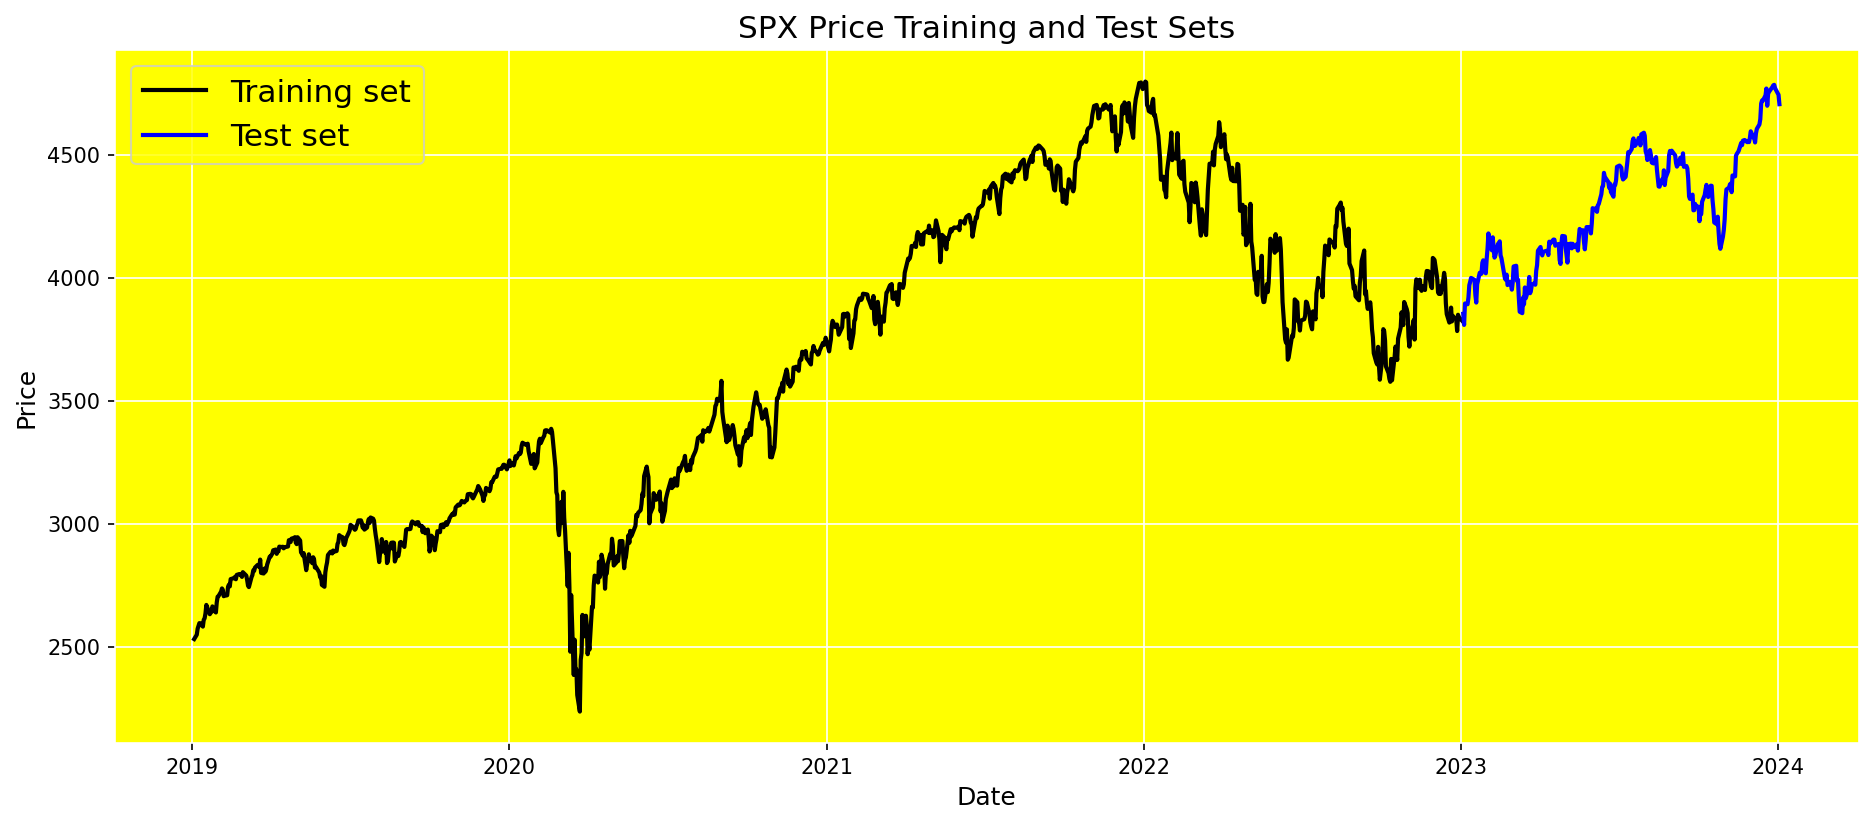

In [ ]:
#  Bitcoin Price Training and Test Sets Plot:

plt.figure(figsize=(15, 6), dpi=150)
plt.rcParams['axes.facecolor'] = 'yellow'
plt.rc('axes',edgecolor='white')
plt.plot(df.Date[:-test_size], df.Close[:-test_size], color='black', lw=2)
plt.plot(df.Date[-test_size:], df.Close[-test_size:], color='blue', lw=2)
plt.title('SPX Price Training and Test Sets', fontsize=15)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.legend(['Training set', 'Test set'], loc='upper left', prop={'size': 15})
plt.grid(color='white')
plt.show()

In [ ]:
#  Step 7: Data Scaling
#  Since we aim to predict Price only based on its historical data, we scale Price using MinMaxScaler to avoid intensive computations:

scaler = MinMaxScaler()
scaler.fit(df.Close.values.reshape(-1,1))

MinMaxScaler()

In [ ]:
#  Step 8: Restructure Data & Create Sliding Window

#  The use of prior time steps to predict the next time step is called sliding window.
#  In this way, time series data can be expressed as supervised learning.
#  We can do this by using previous time steps as input variables and use the next time step as the output variable.
#  The number of previous time steps is called the window width. Here we set window width to 60.
#  Therefore, X_train and X_test will be nested lists containing lists of 60 time-stamp prices.
#  y_train and y_test are also lists of gold prices containing the next day's gold price corresponds to each list in X_train and X_test respectively:

window_size = 60

In [ ]:
#  Training Set:

train_data = df.Close[:-test_size]
train_data = scaler.transform(train_data.values.reshape(-1,1))
X_train = []
y_train = []

for i in range(window_size, len(train_data)):
    X_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])


#  Test Set:

test_data = df.Close[-test_size-60:]
test_data = scaler.transform(test_data.values.reshape(-1,1))
X_test = []
y_test = []

for i in range(window_size, len(test_data)):
    X_test.append(test_data[i-60:i, 0])
    y_test.append(test_data[i, 0])

In [ ]:
#  Step 9: Converting Data to Numpy Arrays

#  Now X_train and X_test are nested lists (two-dimensional lists) and y_train is a one-dimensional list.
#  We need to convert them to numpy arrays with a higher dimension, which is the data format accepted by TensorFlow when training the neural network:

X_train = np.array(X_train)
X_test  = np.array(X_test)
y_train = np.array(y_train)
y_test  = np.array(y_test)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test  = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
y_train = np.reshape(y_train, (-1,1))
y_test  = np.reshape(y_test, (-1,1))

print('X_train Shape: ', X_train.shape)
print('y_train Shape: ', y_train.shape)
print('X_test Shape:  ', X_test.shape)
print('y_test Shape:  ', y_test.shape)

X_train Shape:  (947, 60, 1)
y_train Shape:  (947, 1)
X_test Shape:   (251, 60, 1)
y_test Shape:   (251, 1)


In [ ]:
#  Step 10: Creating an LSTM Network

#  We build an LSTM network, which is a type of Recurrent Neural Networks designed to solve vanishing gradient problem:

#  Model Definition:

def define_model():
    input1 = Input(shape=(window_size,1))
    x = LSTM(units = 64, return_sequences=True)(input1)
    x = Dropout(0.2)(x)
    x = LSTM(units = 64, return_sequences=True)(x)
    x = Dropout(0.2)(x)
    x = LSTM(units = 64)(x)
    x = Dropout(0.2)(x)
    x = Dense(32, activation='softmax')(x)
    dnn_output = Dense(1)(x)

    model = Model(inputs=input1, outputs=[dnn_output])
    model.compile(loss='mean_squared_error', optimizer='Nadam')
    model.summary()

    return model

In [ ]:
#  Model Training:

model = define_model()
history = model.fit(X_train, y_train, epochs=150, batch_size=32, validation_split=0.1, verbose=1)

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 60, 1)]           0         
                                                                 
 lstm_12 (LSTM)              (None, 60, 64)            16896     
                                                                 
 dropout_12 (Dropout)        (None, 60, 64)            0         
                                                                 
 lstm_13 (LSTM)              (None, 60, 64)            33024     
                                                                 
 dropout_13 (Dropout)        (None, 60, 64)            0         
                                                                 
 lstm_14 (LSTM)              (None, 64)                33024     
                                                                 
 dropout_14 (Dropout)        (None, 64)                0   

In [ ]:
#  Step 11: Model Evaluation
#  Next, we evaluate our time series forecast using MAPE (Mean Absolute Percentage Error) metric:

result = model.evaluate(X_test, y_test)
y_pred = model.predict(X_test)

8/8 [==============================] - 2s 35ms/step


In [ ]:
MAPE = mean_absolute_percentage_error(y_test, y_pred)
Accuracy = 1 - MAPE

print("Test Loss:", result)
print("Test MAPE:", MAPE)
print("Test Accuracy:", Accuracy)

Test Loss: 0.0013956577749922872
Test MAPE: 0.035894320773456466
Test Accuracy: 0.9641056792265436


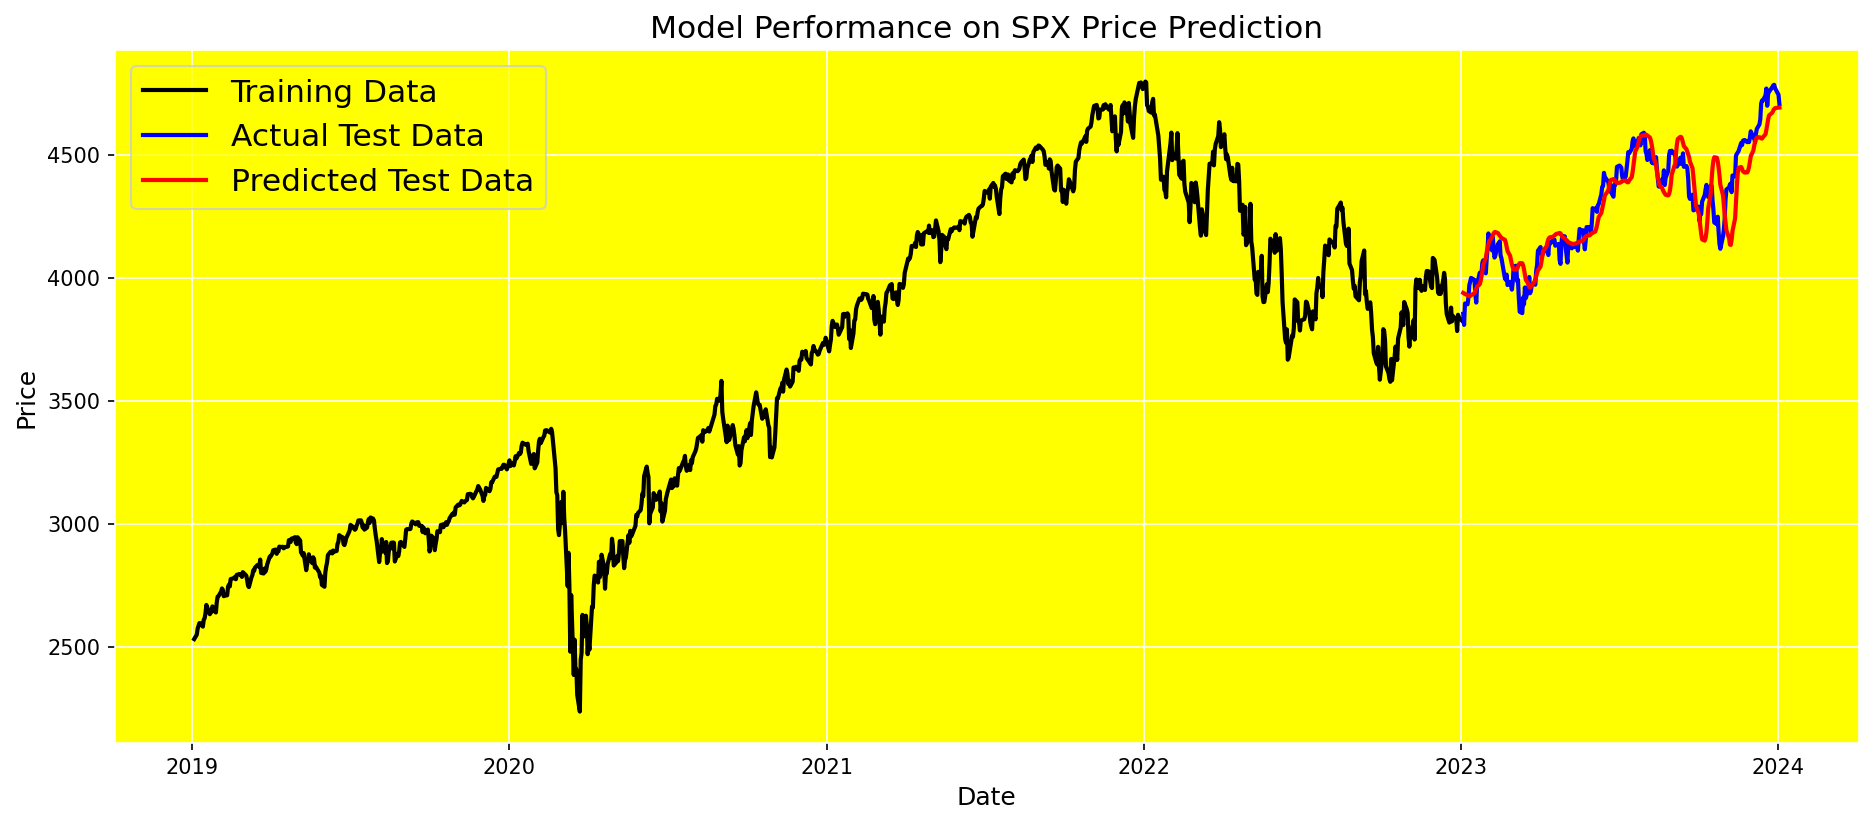

In [ ]:
#  Step 12: Visualizing Results
#  Returning the actual and predicted Price values to their primary scale:

y_test_true = scaler.inverse_transform(y_test)
y_test_pred = scaler.inverse_transform(y_pred)

# Investigating the closeness of the prices predicted by the model to the actual prices:

plt.figure(figsize=(15, 6), dpi=150)
plt.rcParams['axes.facecolor'] = 'yellow'
plt.rc('axes',edgecolor='white')
plt.plot(df['Date'].iloc[:-test_size], scaler.inverse_transform(train_data), color='black', lw=2)
plt.plot(df['Date'].iloc[-test_size:], y_test_true, color='blue', lw=2)
plt.plot(df['Date'].iloc[-test_size:], y_test_pred, color='red', lw=2)
plt.title('Model Performance on SPX Price Prediction', fontsize=15)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.legend(['Training Data', 'Actual Test Data', 'Predicted Test Data'], loc='upper left', prop={'size': 15})
plt.grid(color='white')
plt.show()